In [38]:
#Loading dataset
import pandas as pd
import sys
sys.path.append(r"C:\Users\Ericd\OneDrive\Desktop\wudimoxing")
from wudi_regression import Regression
from wudi_classification import Classification
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from pickle import dump, load
import optuna
from colorama import Fore
from IPython.display import display

df = pd.read_excel('QAQ.xlsx')
df.to_csv('Wastewater treatment plant.csv', index=False)

In [39]:
file1_path = "Wastewater treatment plant.csv"
file2_path = "data_features_phylums.csv"


df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)


# Concatenate the DataFrames horizontally (along columns)
combination = pd.concat([df1, df2], axis=1)

# Replace 'final.csv' with the desired name for the combined CSV file
combination.to_csv('CHANGE RATE(PHYLUM).csv', index=False)
df = pd.read_csv('CHANGE RATE(PHYLUM).csv')

In [40]:
df = df.sort_values(by='Latitude', ascending=True)

In [41]:
new_column_name = 'Aeration tank(HRT)'
df.rename(columns={'Aeration tank': new_column_name}, inplace=True)

new_column_name = 'Plant(HRT)'
df.rename(columns={'Plant': new_column_name}, inplace=True)

new_column_name = 'Annual average temperature (oC)'
df.rename(columns={'Annual average': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily maximum temperature (oC) '
df.rename(columns={'Annual mean of daily maximum': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily minimum temperature (oC) '
df.rename(columns={'Annual mean of daily minimum': new_column_name}, inplace=True)

new_column_name = 'Sampling month average temperature (oC)'
df.rename(columns={'Sampling month average': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily minimum temperature (oC) '
df.rename(columns={'Annual mean of daily minimum': new_column_name}, inplace=True)

new_column_name = 'Annual Precipitation(mm)'
df.rename(columns={'Annual': new_column_name}, inplace=True)

new_column_name = 'Sampling month Precipitation(mm)'
df.rename(columns={'Sampling month': new_column_name}, inplace=True)

new_column_name = 'Annual Precipitation(mm)'
df.rename(columns={'Annual': new_column_name}, inplace=True)

new_column_name = 'General AS process type'
df.rename(columns={'General type ': new_column_name}, inplace=True)

new_column_name = 'Detailed AS process type'
df.rename(columns={'Detailed type': new_column_name}, inplace=True)

new_column_name = 'Percentage of Industry wastewater source'
df.rename(columns={'Percentage': new_column_name}, inplace=True)

new_column_name = 'Contained in Inf? (Industry wastewater source)'
df.rename(columns={'Contained in Inf?': new_column_name}, inplace=True)

new_column_name = 'Others(Order)'
df.rename(columns={'Others.2': new_column_name}, inplace=True)

new_column_name = 'Others(Classs)'
df.rename(columns={'Others.1': new_column_name}, inplace=True)

new_column_name = 'Others(Phylum)'
df.rename(columns={'Others': new_column_name}, inplace=True)

new_column_name = 'Unclassified(Phylum)'
df.rename(columns={'Unclassified': new_column_name}, inplace=True)

new_column_name = 'Unclassified(Classs)'
df.rename(columns={'Unclassified.1': new_column_name}, inplace=True)

new_column_name = 'Unclassified(Order)'
df.rename(columns={'Unclassified.2': new_column_name}, inplace=True)



In [42]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

Sample ID                       0.336134
WWTP ID                         0.084034
SiteID                          0.336134
Site Name                       0.336134
Sampling Date                   6.386555
                                  ...   
Spirochaetota                   0.336134
Nanoarchaeota                   0.336134
Elusimicrobiota                 0.336134
SAR324 clade(Marine group B)    0.336134
Armatimonadota                  0.336134
Length: 89, dtype: float64

In [43]:
df.columns

Index(['Sample ID', 'WWTP ID', 'SiteID', 'Site Name', 'Sampling Date',
       'Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Sampling moment',
       'Annual Precipitation(mm)', 'Sampling month Precipitation(mm)',
       'GDP per capita (dollars)', 'City population', 'Year of plant build',
       'Designed capacity (m3/d)', 'Actual Inf rate (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'Nitrification', 'Denitrification', 'Aerator type', 'BOD (mg/l) Inf',
       'BOD (mg/l) inf/(1+recycle ratio)', 'BOD (mg/l) Aeration tank inf',
       'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Inf/(1+recycle ratio)',
       'COD (mg/l) Aer

In [44]:
columns_to_drop = ['Sample ID', 'WWTP ID', 'SiteID', 'Site Name', 'Sampling Date',
        'Sampling moment','Actual Inf rate (m3/d)',
       'Nitrification', 'Denitrification','Aerator type', 'BOD (mg/l) inf/(1+recycle ratio)', 'BOD (mg/l) Aeration tank inf',
       'COD (mg/l) Inf/(1+recycle ratio)',
       'COD (mg/l) Aeration tank inf', 'F/M (kg BOD/kg MLSS-d)', 'NH4-N (mg/l) Aeration tank inf', 
        'TN (mg/l) Aeration tank inf','TP (mg/l) Aeration tank inf', 'Conductivity (μS/cm)','SRTd',
       'COD', 'NH4N', 'TP','NH4-N (mg/l)', 'NO3-N (mg/l)', 'SVI (ml/g)',
        'Sample ID.1' ,'Unnamed: 0','Sampling month average.1',
    'Sampling month.1']

df = df.drop(columns=columns_to_drop)

In [45]:
df.columns

Index(['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature 

In [46]:
missing_percentage = df.isnull().sum() / len(df) * 100

In [47]:
missing_percentage

Latitude                                           0.336134
Longitude                                         14.201681
City Name                                          0.336134
Country/Region                                     0.336134
Continent                                          0.336134
Climate typea                                      0.336134
Annual average temperature (oC)                    0.336134
Annual mean of daily maximum temperature (oC)      0.336134
Annual mean of daily minimum temperature (oC)      0.336134
Sampling month average temperature (oC)           11.428571
Annual Precipitation(mm)                           0.336134
Sampling month Precipitation(mm)                   2.268908
GDP per capita (dollars)                           4.201681
City population                                    1.680672
Year of plant build                               21.848739
Designed capacity (m3/d)                          18.319328
Volume of aeration tanks (m3)           

In [48]:
df.columns

Index(['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature 

In [49]:
targets = df.columns.to_numpy()
targets = targets[0:]
print(targets)

['Latitude' 'Longitude' 'City Name' 'Country/Region' 'Continent'
 'Climate typea' 'Annual average temperature (oC)'
 'Annual mean of daily maximum temperature (oC) '
 'Annual mean of daily minimum temperature (oC) '
 'Sampling month average temperature (oC)' 'Annual Precipitation(mm)'
 'Sampling month Precipitation(mm)' 'GDP per capita (dollars)'
 'City population' 'Year of plant build' 'Designed capacity (m3/d)'
 'Volume of aeration tanks (m3)' 'Plant(HRT)' 'Aeration tank(HRT)'
 'SRT (d)' 'General AS process type' 'Detailed AS process type'
 'BOD (mg/l) Inf' 'BOD (mg/l) Eff' 'COD (mg/l) Inf' 'COD (mg/l) Eff'
 'NH4-N (mg/l) Inf' 'NH4-N (mg/l) Eff' 'TN (mg/l) Inf' 'TN (mg/l) Eff'
 'TP (mg/l) Inf' 'TP (mg/l) Eff'
 'Contained in Inf? (Industry wastewater source)'
 'Percentage of Industry wastewater source' 'MLSS (mg/l)' 'DO (mg/l)' 'pH'
 'Mixed liquid temperature (oC)' 'Proteobacteria' 'Bacteroidota'
 'Patescibacteria' 'Unclassified(Phylum)' 'Firmicutes' 'Planctomycetota'
 'Verrucomicrobi

In [50]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # 这里的 n_neighbors 可以根据你的需求进行调整

In [51]:
columns_to_extract = ['Latitude', 'Longitude', 
        'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature (oC)',
       'Proteobacteria', 'Bacteroidota', 'Patescibacteria',
       'Unclassified(Phylum)', 'Firmicutes', 'Planctomycetota',
       'Verrucomicrobiota', 'Chloroflexi', 'Myxococcota', 'Others(Phylum)',
       'Bdellovibrionota', 'Actinobacteriota', 'Acidobacteriota',
       'Desulfobacterota', 'Dependentiae', 'Cyanobacteria', 'Spirochaetota',
       'Nanoarchaeota', 'Elusimicrobiota', 'SAR324 clade(Marine group B)',
       'Armatimonadota']

In [52]:
df_1 = df[columns_to_extract]

In [53]:
data_types = df.dtypes

In [54]:

# Filter the columns that have the data type 'object'
object_columns = data_types[data_types == 'object'].index

# Display the list of columns with object data type
print("Columns with object data type:")
print(object_columns)

Columns with object data type:
Index(['City Name', 'Country/Region', 'Continent', 'Climate typea',
       'General AS process type', 'Detailed AS process type',
       'Contained in Inf? (Industry wastewater source)'],
      dtype='object')


In [55]:
df_filled = pd.DataFrame(imputer.fit_transform(df_1), columns=df_1.columns)

In [56]:
df_filled

,Latitude,Longitude,Annual average temperature (oC),Annual mean of daily maximum temperature (oC),Annual mean of daily minimum temperature (oC),Sampling month average temperature (oC),Annual Precipitation(mm),Sampling month Precipitation(mm),GDP per capita (dollars),City population,...,Actinobacteriota,Acidobacteriota,Desulfobacterota,Dependentiae,Cyanobacteria,Spirochaetota,Nanoarchaeota,Elusimicrobiota,SAR324 clade(Marine group B),Armatimonadota
0,-43.628613,172.725360,11.000000,23.000000,2.000000,9.400000,604.000000,65.000000,31766.000000,1.558900e+06,...,0.605469,3.316406,0.312500,0.035156,0.207031,0.445312,0.050781,0.230469,0.093750,0.046875
1,-43.628613,172.725360,11.000000,23.000000,2.000000,9.400000,604.000000,65.000000,31766.000000,1.558900e+06,...,2.375000,7.785156,0.871094,0.332031,0.144531,0.191406,0.203125,0.910156,0.179688,0.117188
2,-43.628613,172.725360,11.000000,23.000000,2.000000,9.400000,604.000000,65.000000,31766.000000,1.558900e+06,...,3.335938,7.390625,0.875000,0.335938,0.148438,0.128906,0.246094,1.117188,0.230469,0.121094
3,-43.591660,172.380415,11.000000,23.000000,2.000000,9.400000,604.000000,65.000000,31766.000000,1.558900e+06,...,0.511719,2.527344,0.589844,0.242188,0.117188,1.355469,0.000000,0.132812,0.214844,0.066406
4,-43.591660,172.380415,11.000000,23.000000,2.000000,9.400000,604.000000,65.000000,31766.000000,1.558900e+06,...,0.589844,2.167969,0.621094,0.238281,0.121094,1.554688,0.000000,0.128906,0.152344,0.066406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,64.853378,-147.810828,0.000000,24.000000,-38.000000,8.000000,322.000000,33.000000,49196.000000,1.102935e+05,...,0.558594,0.195312,0.367188,0.000000,0.003906,0.023438,0.000000,0.000000,0.000000,0.003906
1186,24.773515,-2.590960,15.704257,29.196796,-3.584195,23.640398,1007.236931,111.701204,41396.428947,5.092116e+06,...,2.760174,2.592828,0.602969,0.171256,0.390987,0.511462,0.055788,0.231342,0.235353,0.264383
1187,24.773515,-2.590960,15.704257,29.196796,-3.584195,23.640398,1007.236931,111.701204,41396.428947,5.092116e+06,...,2.760174,2.592828,0.602969,0.171256,0.390987,0.511462,0.055788,0.231342,0.235353,0.264383
1188,24.773515,-2.590960,15.704257,29.196796,-3.584195,23.640398,1007.236931,111.701204,41396.428947,5.092116e+06,...,2.760174,2.592828,0.602969,0.171256,0.390987,0.511462,0.055788,0.231342,0.235353,0.264383


In [57]:
df.drop(columns = columns_to_extract)

,City Name,Country/Region,Continent,Climate typea,General AS process type,Detailed AS process type,Contained in Inf? (Industry wastewater source)
374,Christchurch,New Zealand,Australasia,Cfc,NaN,NaN,NaN
375,Christchurch,New Zealand,Australasia,Cfc,NaN,NaN,NaN
376,Christchurch,New Zealand,Australasia,Cfc,NaN,NaN,NaN
382,Christchurch,New Zealand,Australasia,Cfc,NaN,NaN,NaN
381,Christchurch,New Zealand,Australasia,Cfc,NaN,NaN,NaN
...,...,...,...,...,...,...,...
569,Fairbanks,United States,North America,Dsc,extended aeration,Pure Oxygen extended aeration,Yes
1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1188,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_filled.columns

Index(['Latitude', 'Longitude', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf',
       'COD (mg/l) Eff', 'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff',
       'TN (mg/l) Inf', 'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature (oC)', 'Proteobacteria', 'Bacteroidota',
       'Patescibacteria', 'Unclassified(Phylum)', 'Firmicutes',
       'Planctomycetota', 'Verrucomicrobiota', 'Chloroflexi', 'Myxococcota',
     

In [59]:
columns_to_replace = ['Latitude', 'Longitude', 
        'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature (oC)', 
       'Proteobacteria', 'Bacteroidota', 'Patescibacteria',
       'Unclassified(Phylum)', 'Firmicutes', 'Planctomycetota',
       'Verrucomicrobiota', 'Chloroflexi', 'Myxococcota', 'Others(Phylum)',
       'Bdellovibrionota', 'Actinobacteriota', 'Acidobacteriota',
       'Desulfobacterota', 'Dependentiae', 'Cyanobacteria', 'Spirochaetota',
       'Nanoarchaeota', 'Elusimicrobiota', 'SAR324 clade(Marine group B)',
       'Armatimonadota']

df[columns_to_replace] = df_filled[columns_to_replace].values


In [60]:
'''
#df['BOD(difference)'] = df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'] #regressor1
#df['COD(difference)'] = df['COD (mg/l) Inf']- df['COD (mg/l) Eff'] #regressor2
#df['NH4-N(difference)'] = df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'] #regressor3
#df['TN(difference)'] = df['TN (mg/l) Inf']- df['TN (mg/l) Eff'] #regressor4
#df['TP(difference)'] = df['TP (mg/l) Inf']- df['TP (mg/l) Eff'] #regressor5
'''
df['BOD(Percentage)'] = (df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'])/df['BOD (mg/l) Inf'] #regressor6
df['COD(Percentage)'] = (df['COD (mg/l) Inf']- df['COD (mg/l) Eff'])/df['COD (mg/l) Inf'] #regressor7
df['NH4-N(Percentage)'] = (df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'])/df['NH4-N (mg/l) Inf'] #regressor8
df['TN(Percentage)'] = (df['TN (mg/l) Inf']- df['TN (mg/l) Eff'])/df['TN (mg/l) Inf'] #regressor9
df['TP(Percentage)'] = (df['TP (mg/l) Inf']- df['TP (mg/l) Eff'])/df['TP (mg/l) Inf'] #regressor10


In [61]:
df.columns

Index(['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature 

In [62]:
df.iloc

In [63]:
df.isnull().sum()

Latitude             0
Longitude            0
City Name            4
Country/Region       4
Continent            4
                    ..
BOD(Percentage)      0
COD(Percentage)      0
NH4-N(Percentage)    0
TN(Percentage)       0
TP(Percentage)       0
Length: 64, dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df

,Latitude,Longitude,City Name,Country/Region,Continent,Climate typea,Annual average temperature (oC),Annual mean of daily maximum temperature (oC),Annual mean of daily minimum temperature (oC),Sampling month average temperature (oC),...,Spirochaetota,Nanoarchaeota,Elusimicrobiota,SAR324 clade(Marine group B),Armatimonadota,BOD(Percentage),COD(Percentage),NH4-N(Percentage),TN(Percentage),TP(Percentage)
362,-42.873306,147.358722,Tasmania,Australia,Australasia,Cfb,12.0,24.0,3.0,14.0,...,0.082031,0.070312,0.085938,0.941406,0.875000,0.982609,0.862597,0.341538,0.456667,0.333333
361,-42.873306,147.358722,Tasmania,Australia,Australasia,Cfb,12.0,24.0,3.0,14.0,...,0.042969,0.027344,0.082031,0.605469,0.480469,0.982609,0.862597,0.341538,0.456667,0.333333
360,-42.873306,147.358722,Tasmania,Australia,Australasia,Cfb,12.0,24.0,3.0,14.0,...,0.058594,0.042969,0.085938,0.511719,0.476562,0.982609,0.862597,0.341538,0.456667,0.333333
359,-42.873306,147.358722,Tasmania,Australia,Australasia,Cfb,12.0,24.0,3.0,14.0,...,0.054688,0.082031,0.078125,0.964844,0.941406,0.982609,0.862597,0.341538,0.456667,0.333333
363,-42.873306,147.358722,Tasmania,Australia,Australasia,Cfb,12.0,24.0,3.0,14.0,...,0.066406,0.085938,0.085938,1.343750,1.371094,0.982609,0.862597,0.341538,0.456667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,64.853378,-147.810828,Fairbanks,United States,North America,Dsc,0.0,24.0,-38.0,8.0,...,0.035156,0.000000,0.003906,0.000000,0.000000,0.862500,0.808496,0.324074,0.838858,0.760192
568,64.853378,-147.810828,Fairbanks,United States,North America,Dsc,0.0,24.0,-38.0,8.0,...,0.042969,0.000000,0.000000,0.000000,0.003906,0.862500,0.808496,0.324074,0.838858,0.760192
565,64.853378,-147.810828,Fairbanks,United States,North America,Dsc,0.0,24.0,-38.0,8.0,...,0.027344,0.000000,0.000000,0.000000,0.003906,0.862500,0.808496,0.324074,0.838858,0.760192
567,64.853378,-147.810828,Fairbanks,United States,North America,Dsc,0.0,24.0,-38.0,8.0,...,0.031250,0.000000,0.007812,0.000000,0.003906,0.862500,0.808496,0.324074,0.838858,0.760192


In [66]:
df['Climate typea'] = df['Climate typea'].replace({'Cfa': 0, 'Dwa': 1,'Dfb': 2,'Dfa': 3,'Cwa': 4,'Csa':5,'Csb':6,'Cfb':7,'Aw':8,'Af':9,'Cfc':10,'Cwb':11,'Dsc':12,'BWh':13,'Cwc':14,'Am':15,'ET':16})

In [67]:
# Define the list of city names in the desired order
desired_city_order = [
    'Tasmania', 'Adelaide', 'Sydney', 'Cape Town', 'Santiago', 'Durban', 'Brisbane',
    'Pretoria', 'BRRP', 'Belo Horizonte', 'Cairns', 'Fortaleza', 'Singapore',
    'Cali', 'Sanya', 'Guadalajara', 'Honolulu', 'Shenzhen', 'South Taiwan',
    'Xiamen', 'Monterrey', 'Changsha', 'Chongqing', 'Houston', 'Wuhan', 'Chengdu',
    'Shanghai', 'USTF', 'Wuxi', 'USVD', 'USWR', 'Dallas', 'USOP', 'San Diego',
    'Phoenix', 'USAG', 'USAT', 'Los Angeles', 'Xian', 'Oklahoma City', 'USOK',
    'Fort Wayne', 'Raleigh', 'Qingdao', 'Johnson City', 'Kingsport', 'Jinan',
    'Virginia Beach', 'Seoul-Incheon', 'San Francisco', 'Dalian', 'Columbia MO',
    'USMD', 'Beijing', 'Hartford', 'Rome', 'Chicago', 'Ann Arbor', 'Guelph',
    'Bologna', 'Cowansville', 'Salaberry de Valleyfield', 'Farnham', 'Pincourt',
    'Vaudreuil Dorion', 'Granby', 'Sainte Catherine', 'Venice-Padova',
    'Marieville', 'Portland', 'Saint-Hyacinthe', 'Haerbin', 'Val-David',
    'Mont Tremblant', 'Buchs', 'USST', 'Bruck an der Leitha', 'Mayerling', 'DEHE',
    'DEKS', 'Newcastle upon Tyne', 'Falkenberg', 'Aalborg', 'Ullared', 'Varberg',
    'Vallby', 'Fairbanks'
]

desired_country_order = [
    'Australia', 'South Africa', 'Chile', 'Brazil', 'Singapore', 'Colombia',
    'China', 'Mexico', 'United States', 'Taiwan (ROC)', 'South Korea', 'Italy',
    'Canada', 'Switzerland', 'Austria', 'Germany', 'United Kindom', 'Sweden',
    'Denmark'
]

desired_continent_order = [
    'Australasia', 'Africa', 'South America', 'Asia', 'North America', 'Europe'
]

# Create a mapping function
def create_mapping(desired_order):
    return {item: idx for idx, item in enumerate(desired_order)}

# Create mappings for city names, country names, and continent names
city_id_mapping = create_mapping(desired_city_order)
country_id_mapping = create_mapping(desired_country_order)
continent_id_mapping = create_mapping(desired_continent_order)

# Replace the respective columns with corresponding ID values
df['City Name'] = df['City Name'].map(city_id_mapping)
df['Country/Region'] = df['Country/Region'].map(country_id_mapping)
df['Continent'] = df['Continent'].map(continent_id_mapping)

# Print the resulting DataFrames with IDs
print(df[['City Name']])
print(df[['Country/Region']])
print(df[['Continent']])

     City Name
362          0
361          0
360          0
359          0
363          0
..         ...
570         86
568         86
565         86
567         86
569         86

[789 rows x 1 columns]
     Country/Region
362               0
361               0
360               0
359               0
363               0
..              ...
570               8
568               8
565               8
567               8
569               8

[789 rows x 1 columns]
     Continent
362          0
361          0
360          0
359          0
363          0
..         ...
570          4
568          4
565          4
567          4
569          4

[789 rows x 1 columns]


In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['Detailed AS process type'])
df['Detailed AS process type'] = encoded_cities
print(df[['Detailed AS process type']])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['General AS process type'])
df['General AS process type'] = encoded_cities
print(df[['General AS process type']])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['Contained in Inf? (Industry wastewater source)'])
df['Contained in Inf? (Industry wastewater source)'] = encoded_cities
print(df[['Contained in Inf? (Industry wastewater source)']])




     Detailed AS process type
362                        38
361                        38
360                        38
359                        38
363                        38
..                        ...
570                        34
568                        34
565                        34
567                        34
569                        34

[789 rows x 1 columns]
     General AS process type
362                        4
361                        4
360                        4
359                        4
363                        4
..                       ...
570                        5
568                        5
565                        5
567                        5
569                        5

[789 rows x 1 columns]
     Contained in Inf? (Industry wastewater source)
362                                               0
361                                               0
360                                               0
359                                 

In [69]:
df

,Latitude,Longitude,City Name,Country/Region,Continent,Climate typea,Annual average temperature (oC),Annual mean of daily maximum temperature (oC),Annual mean of daily minimum temperature (oC),Sampling month average temperature (oC),...,Spirochaetota,Nanoarchaeota,Elusimicrobiota,SAR324 clade(Marine group B),Armatimonadota,BOD(Percentage),COD(Percentage),NH4-N(Percentage),TN(Percentage),TP(Percentage)
362,-42.873306,147.358722,0,0,0,7,12.0,24.0,3.0,14.0,...,0.082031,0.070312,0.085938,0.941406,0.875000,0.982609,0.862597,0.341538,0.456667,0.333333
361,-42.873306,147.358722,0,0,0,7,12.0,24.0,3.0,14.0,...,0.042969,0.027344,0.082031,0.605469,0.480469,0.982609,0.862597,0.341538,0.456667,0.333333
360,-42.873306,147.358722,0,0,0,7,12.0,24.0,3.0,14.0,...,0.058594,0.042969,0.085938,0.511719,0.476562,0.982609,0.862597,0.341538,0.456667,0.333333
359,-42.873306,147.358722,0,0,0,7,12.0,24.0,3.0,14.0,...,0.054688,0.082031,0.078125,0.964844,0.941406,0.982609,0.862597,0.341538,0.456667,0.333333
363,-42.873306,147.358722,0,0,0,7,12.0,24.0,3.0,14.0,...,0.066406,0.085938,0.085938,1.343750,1.371094,0.982609,0.862597,0.341538,0.456667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,64.853378,-147.810828,86,8,4,12,0.0,24.0,-38.0,8.0,...,0.035156,0.000000,0.003906,0.000000,0.000000,0.862500,0.808496,0.324074,0.838858,0.760192
568,64.853378,-147.810828,86,8,4,12,0.0,24.0,-38.0,8.0,...,0.042969,0.000000,0.000000,0.000000,0.003906,0.862500,0.808496,0.324074,0.838858,0.760192
565,64.853378,-147.810828,86,8,4,12,0.0,24.0,-38.0,8.0,...,0.027344,0.000000,0.000000,0.000000,0.003906,0.862500,0.808496,0.324074,0.838858,0.760192
567,64.853378,-147.810828,86,8,4,12,0.0,24.0,-38.0,8.0,...,0.031250,0.000000,0.007812,0.000000,0.003906,0.862500,0.808496,0.324074,0.838858,0.760192


In [70]:
data_types = df.dtypes


In [71]:

# Filter the columns that have the data type 'object'
object_columns = data_types[data_types == 'object'].index

# Display the list of columns with object data type
print("Columns with object data type:")
print(object_columns)

Columns with object data type:
Index([], dtype='object')


In [72]:
df.columns

Index(['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature 

In [73]:
features_bodp = df.drop(['BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)'], axis = 1)
labels_bodp = df['BOD(Percentage)']

features_codp = df.drop([ 'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','COD (mg/l) Inf', 'COD (mg/l) Eff'], axis = 1)
labels_codp = df['COD(Percentage)']

features_nh4np = df.drop(['BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff'], axis = 1)
labels_nh4np = df['NH4-N(Percentage)']

features_tnp = df.drop([  'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','TN (mg/l) Inf',
       'TN (mg/l) Eff'], axis = 1)
labels_tnp = df['TN(Percentage)']

features_tpp = df.drop([ 'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','TP (mg/l) Inf', 'TP (mg/l) Eff'], axis = 1)
labels_tpp = df['TP(Percentage)']


In [74]:
remaining_features = features_bodp.columns.tolist()

In [75]:
regressor6 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor6.fit(features_bodp, labels_bodp)

regressor7 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor7.fit(features_codp, labels_codp)

regressor8 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor8.fit(features_nh4np, labels_nh4np)

regressor9 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor9.fit(features_tnp, labels_tnp)

regressor10 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor10.fit(features_tpp, labels_tpp)


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,36.964922,0.032802,0.044087,28.712007,LinearRegression()
1,Stochastic Gradient Descent Regressor,34.384833,0.031009,0.044981,30.021162,SGDRegressor()
2,Elastic Net Regressor,-0.332636,0.032665,0.055622,-1.599269,ElasticNet()
3,Bayesian Ridge Regressor,38.547296,0.030375,0.043531,31.965909,BayesianRidge()
4,Support Vector Regressor,-92.012384,0.072503,0.076946,-108.295240,SVR()
5,K-Neighbors Regressor,63.071065,0.014963,0.033745,57.568855,KNeighborsRegressor()
6,Decision Trees Regressor,94.021225,0.003198,0.013578,80.200058,DecisionTreeRegressor()
7,Random Forest Regressor,92.310419,0.007087,0.015398,80.965457,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,94.797385,0.008870,0.012666,81.221972,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,68.119286,0.027459,0.031354,49.613129,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Catboost_Regressor_1691759353.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Catboost_Regressor_Scaler_1691759353.pkl 

Time Elapsed :  39.48 seconds 


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,21.749080,0.051963,0.063159,30.657031,LinearRegression()
1,Stochastic Gradient Descent Regressor,22.041811,0.052312,0.063041,32.195758,SGDRegressor()
2,Elastic Net Regressor,-3.489984,0.064349,0.072634,-2.214276,ElasticNet()
3,Bayesian Ridge Regressor,24.415044,0.051465,0.062074,34.033221,BayesianRidge()
4,Support Vector Regressor,2.066595,0.062309,0.070657,37.824605,SVR()
5,K-Neighbors Regressor,81.773654,0.017273,0.030482,74.073170,KNeighborsRegressor()
6,Decision Trees Regressor,95.259626,0.003551,0.015545,87.435303,DecisionTreeRegressor()
7,Random Forest Regressor,95.421277,0.009955,0.015278,89.159910,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,93.110468,0.013663,0.018741,90.304576,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,51.503298,0.042539,0.049722,63.415227,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Extra_Trees_Regressor_1691759392.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Extra_Trees_Regressor_Scaler_1691759392.pkl 

Time Elapsed :  39.17 seconds 


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,54.518385,0.160389,0.247497,32.381936,LinearRegression()
1,Stochastic Gradient Descent Regressor,52.855435,0.163368,0.251981,34.288713,SGDRegressor()
2,Elastic Net Regressor,-0.126865,0.203843,0.367221,-1.040135,ElasticNet()
3,Bayesian Ridge Regressor,49.983432,0.160406,0.259543,36.010527,BayesianRidge()
4,Support Vector Regressor,91.596219,0.081424,0.106387,75.854794,SVR()
5,K-Neighbors Regressor,93.744894,0.039000,0.091785,73.251868,KNeighborsRegressor()
6,Decision Trees Regressor,99.881297,0.003299,0.012644,62.335723,DecisionTreeRegressor()
7,Random Forest Regressor,97.249229,0.028519,0.060867,81.911725,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,98.613232,0.028216,0.043217,88.414779,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,85.130492,0.129052,0.141514,71.400721,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Extra_Trees_Regressor_1691759433.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Extra_Trees_Regressor_Scaler_1691759433.pkl 

Time Elapsed :  41.25 seconds 


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,20.845620,0.590479,1.803680,-1777.153962,LinearRegression()
1,Stochastic Gradient Descent Regressor,19.105813,0.538822,1.823394,-1209.081686,SGDRegressor()
2,Elastic Net Regressor,-0.221312,0.310934,2.029560,-31.620925,ElasticNet()
3,Bayesian Ridge Regressor,2.539910,0.310794,2.001407,-42.858905,BayesianRidge()
4,Support Vector Regressor,5.868538,0.234581,1.966932,54.610342,SVR()
5,K-Neighbors Regressor,64.228297,0.136677,1.212528,-1122.714056,KNeighborsRegressor()
6,Decision Trees Regressor,-199.371081,0.496551,3.507736,-9943.020462,DecisionTreeRegressor()
7,Random Forest Regressor,87.884468,0.152828,0.705656,-661.642066,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,91.729101,0.117186,0.583040,-1619.434096,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,99.628253,0.093686,0.123608,56.808401,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/AdaBoost_Regressor_1691759472.pkl and its scaler to lucifer_ml_info/best/regression/scalers/AdaBoost_Regressor_Scaler_1691759472.pkl 

Time Elapsed :  39.32 seconds 


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,24.189276,0.137026,0.202231,16.564199,LinearRegression()
1,Stochastic Gradient Descent Regressor,20.583895,0.143540,0.206984,19.645426,SGDRegressor()
2,Elastic Net Regressor,-1.211162,0.147793,0.233667,-2.671690,ElasticNet()
3,Bayesian Ridge Regressor,24.376880,0.134862,0.201981,23.636770,BayesianRidge()
4,Support Vector Regressor,71.152925,0.089573,0.124748,69.341740,SVR()
5,K-Neighbors Regressor,63.750581,0.054775,0.139841,55.132312,KNeighborsRegressor()
6,Decision Trees Regressor,94.716309,0.011640,0.053389,48.209533,DecisionTreeRegressor()
7,Random Forest Regressor,91.959498,0.031642,0.065860,78.283872,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,94.345257,0.040458,0.055232,78.318573,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,62.143168,0.120262,0.142908,39.211743,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Extra_Trees_Regressor_1691759510.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Extra_Trees_Regressor_Scaler_1691759510.pkl 

Time Elapsed :  37.54 seconds 



In [76]:
fig6 = px.scatter(x=regressor6.y_val, y=regressor6.y_pred, opacity=0.65,
                 labels={'x': 'Actual',
                         'y': 'Predicted'},
                 marginal_x='histogram', marginal_y='histogram',
                 trendline='ols', trendline_color_override='darkblue',
                 template='plotly_dark', title='Actual vs Predicted Values for BOD Percentage')
fig6.show()

fig7 = px.scatter(x=regressor7.y_val, y=regressor7.y_pred, opacity=0.65,
                 labels={'x': 'Actual',
                         'y': 'Predicted'},
                 marginal_x='histogram', marginal_y='histogram',
                 trendline='ols', trendline_color_override='darkblue',
                 template='plotly_dark', title='Actual vs Predicted Values for COD Percentage')
fig7.show()

fig8 = px.scatter(x=regressor8.y_val, y=regressor8.y_pred, opacity=0.65,
                 labels={'x': 'Actual',
                         'y': 'Predicted'},
                 marginal_x='histogram', marginal_y='histogram',
                 trendline='ols', trendline_color_override='darkblue',
                 template='plotly_dark', title='Actual vs Predicted Values for NH4-N Percentage')
fig8.show()

fig9 = px.scatter(x=regressor9.y_val, y=regressor9.y_pred, opacity=0.65,
                 labels={'x': 'Actual',
                         'y': 'Predicted'},
                 marginal_x='histogram', marginal_y='histogram',
                 trendline='ols', trendline_color_override='darkblue',
                 template='plotly_dark', title='Actual vs Predicted Values for TN Percentage')
fig9.show()

fig10 = px.scatter(x=regressor10.y_val, y=regressor10.y_pred, opacity=0.65,
                 labels={'x': 'Actual',
                         'y': 'Predicted'},
                 marginal_x='histogram', marginal_y='histogram',
                 trendline='ols', trendline_color_override='darkblue',
                 template='plotly_dark', title='Actual vs Predicted Values for TP Percentage')
fig10.show()

In [78]:
environmental_keywords = ['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build']

environmental_keywords = np.array(environmental_keywords)

operational_keywords = ['Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type', 'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)', 'pH', 'Mixed liquid temperature (oC)']

operational_keywords = np.array(operational_keywords)




chemical_keywords = ['COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords = np.array(chemical_keywords)

chemical_keywords_1 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords_1 = np.array(chemical_keywords_1)

chemical_keywords_2 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff','COD (mg/l) Inf', 'COD (mg/l) Eff',
       'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords_2 = np.array(chemical_keywords_2)

chemical_keywords_3 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff','COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff',  'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords_3 = np.array(chemical_keywords_3)

chemical_keywords_4 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff','COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', ]

chemical_keywords_4 = np.array(chemical_keywords_4)



biological_keywords = ['Proteobacteria', 'Bacteroidota',
       'Patescibacteria', 'Unclassified(Phylum)', 'Firmicutes',
       'Planctomycetota', 'Verrucomicrobiota', 'Chloroflexi', 'Myxococcota',
       'Others(Phylum)', 'Bdellovibrionota', 'Actinobacteriota',
       'Acidobacteriota', 'Desulfobacterota', 'Dependentiae', 'Cyanobacteria',
       'Spirochaetota', 'Nanoarchaeota', 'Elusimicrobiota',
       'SAR324 clade(Marine group B)', 'Armatimonadota',
]

biological_keywords = np.array(biological_keywords)

cate = [environmental_keywords,operational_keywords,chemical_keywords,biological_keywords]

In [79]:
perm_importance_mean, sorted_idx = regressor6.cate_features(True)

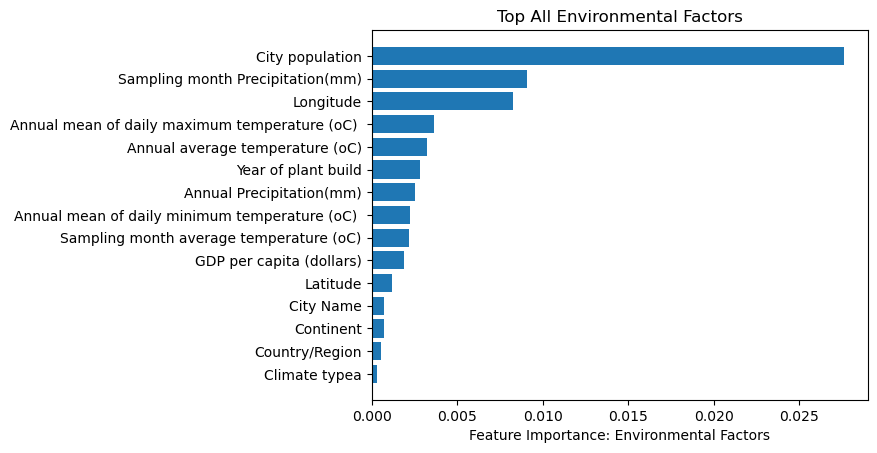

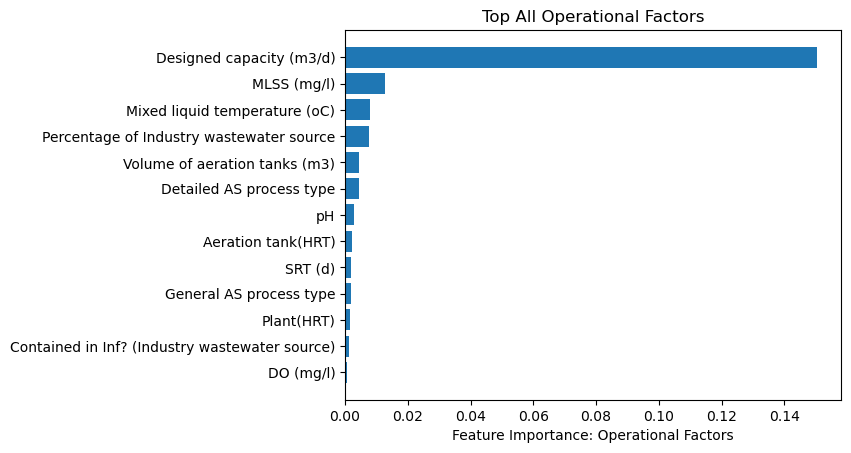

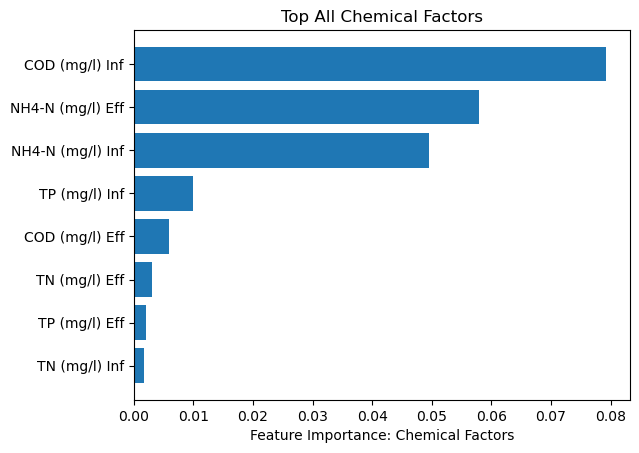

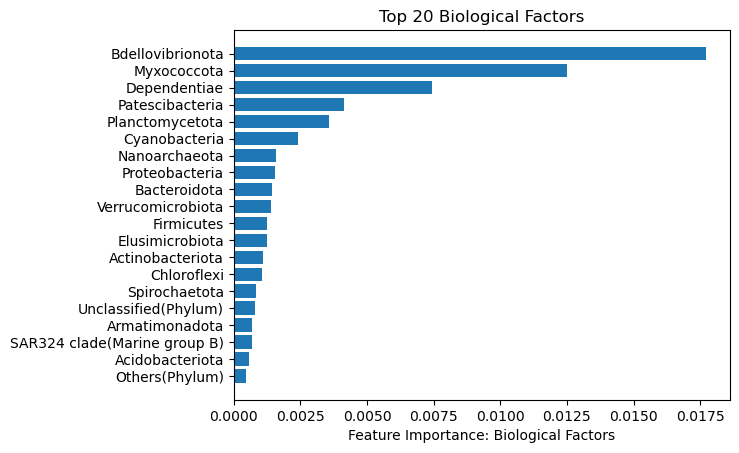

In [80]:
factor_types = ['Environmental', 'Operational', 'Chemical', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_bodp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()


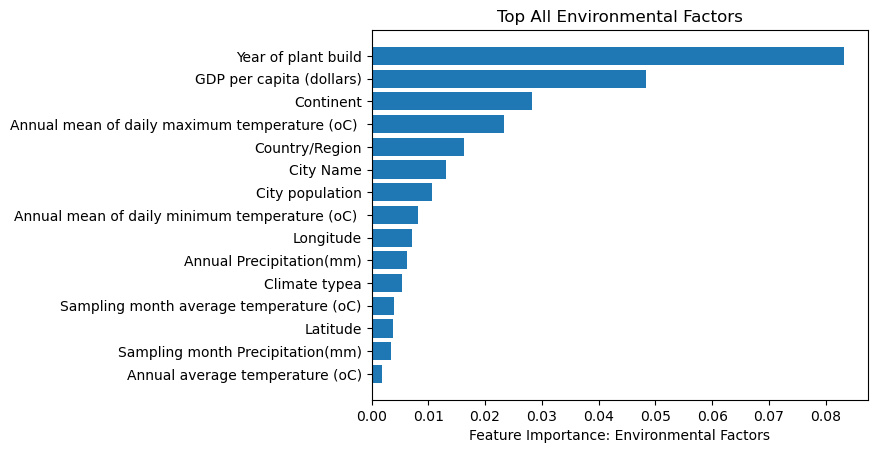

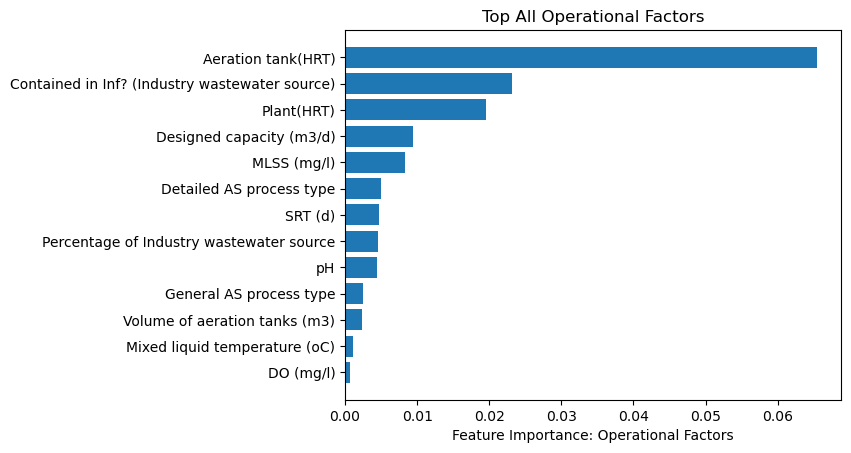

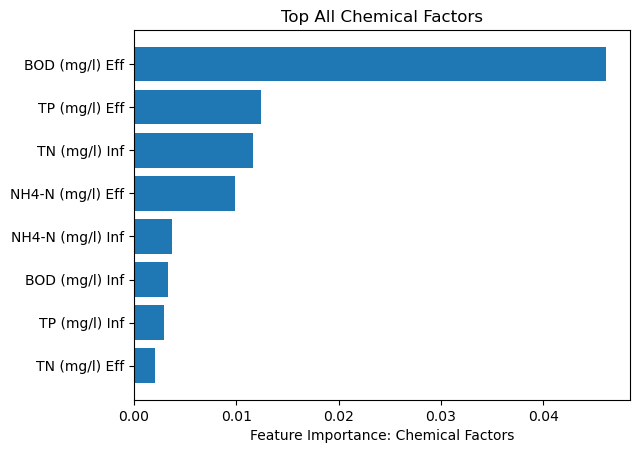

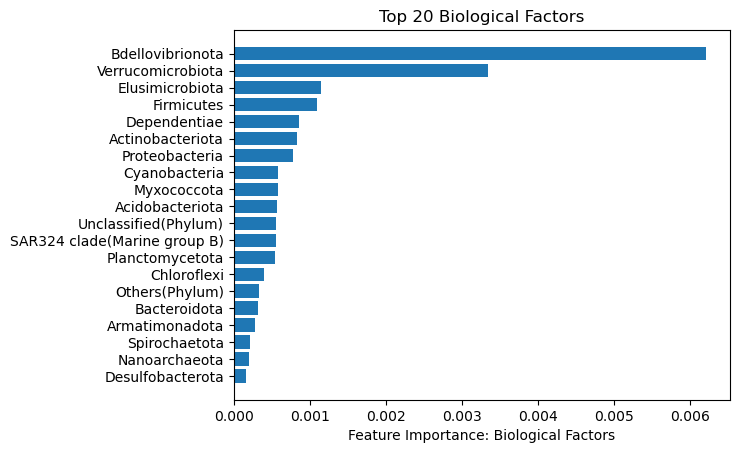

In [81]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_1,biological_keywords]

perm_importance_mean, sorted_idx = regressor7.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_1, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_codp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_codp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()
    

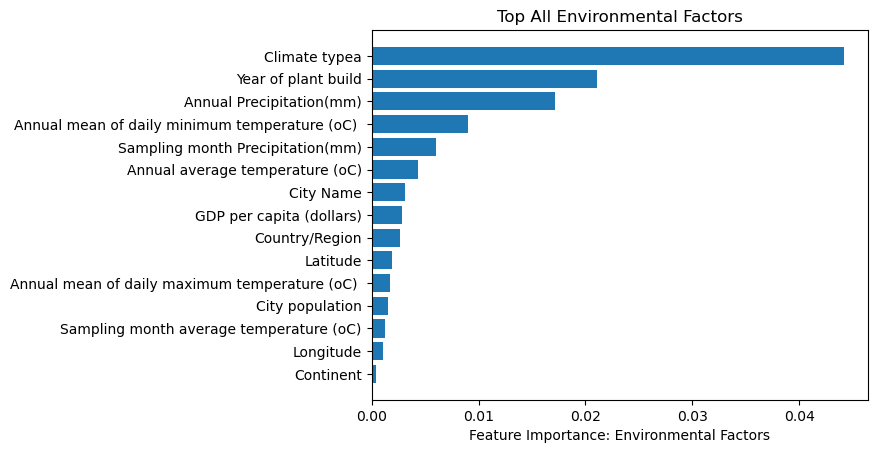

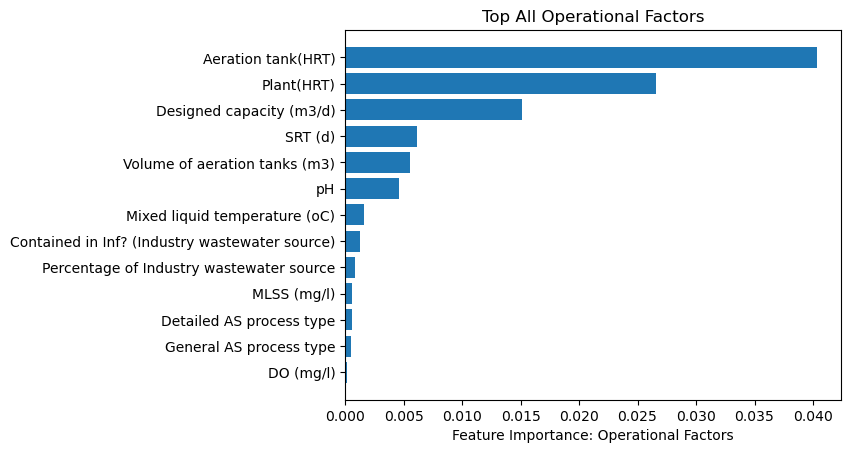

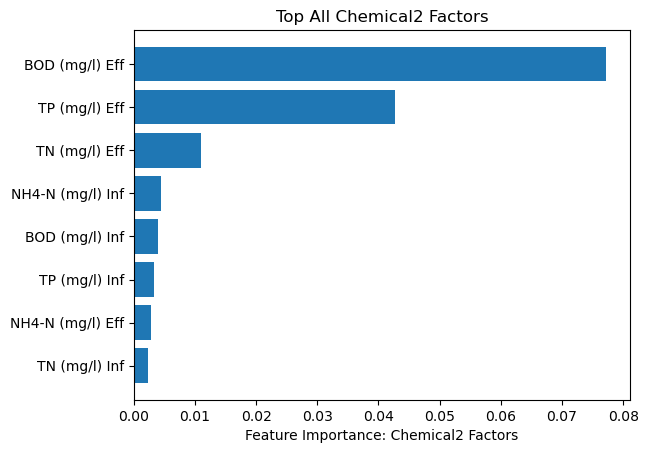

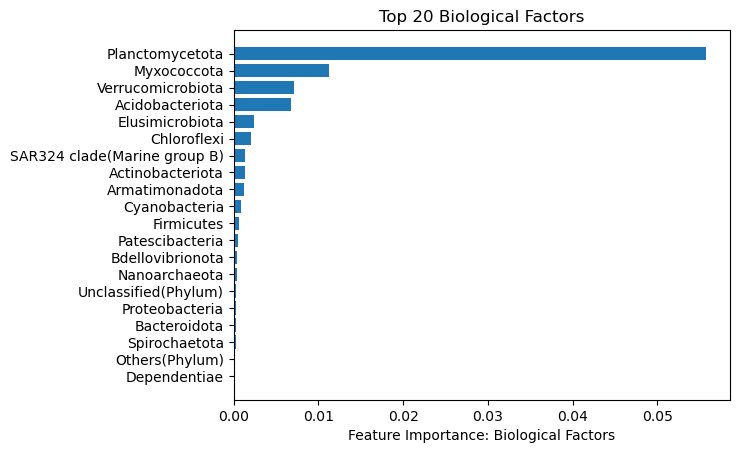

In [82]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_2,biological_keywords]

perm_importance_mean, sorted_idx = regressor8.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical2', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_2, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_nh4np.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_codp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()

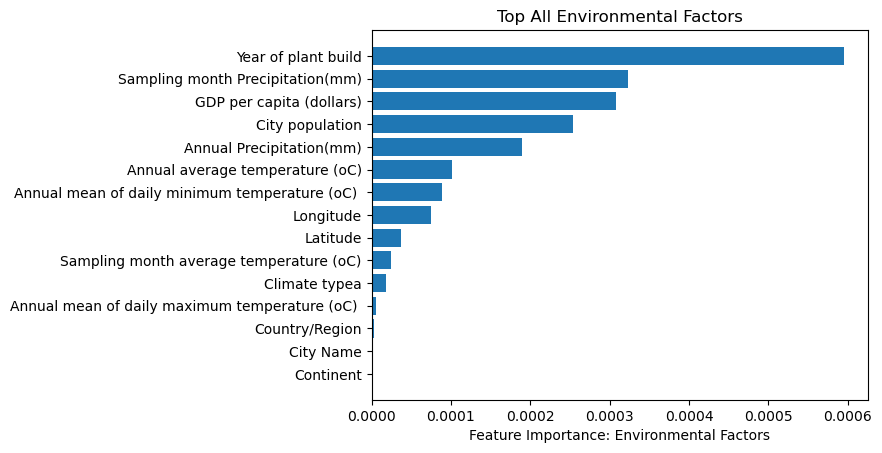

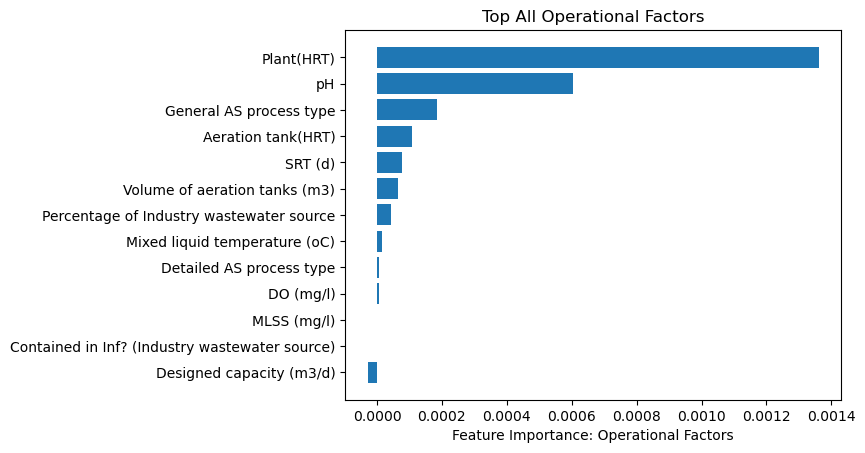

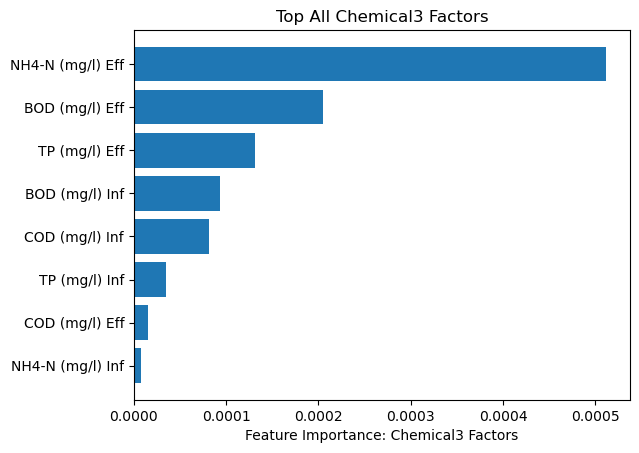

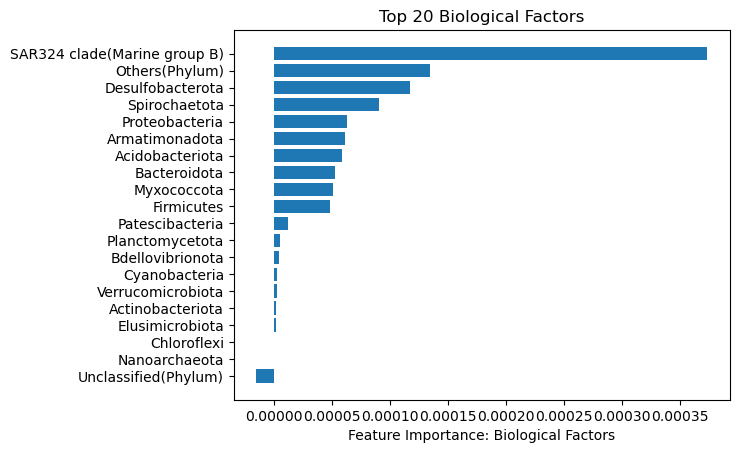

In [83]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_3,biological_keywords]

perm_importance_mean, sorted_idx = regressor9.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical3', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_3, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_tnp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_tnp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()

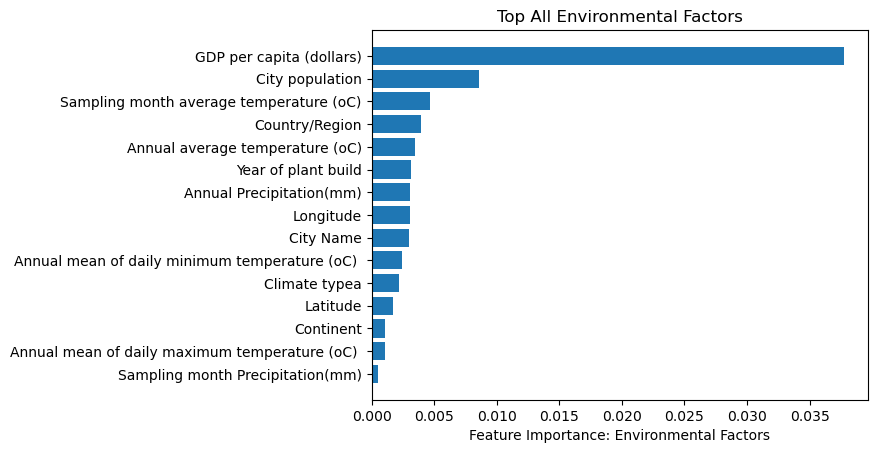

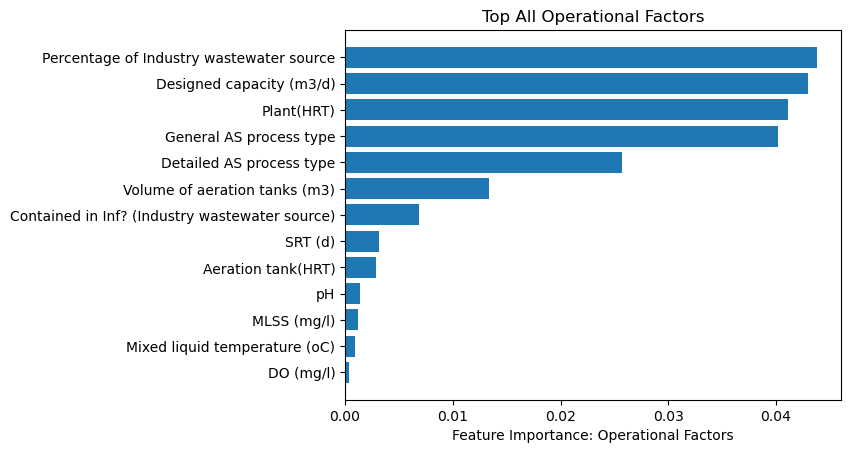

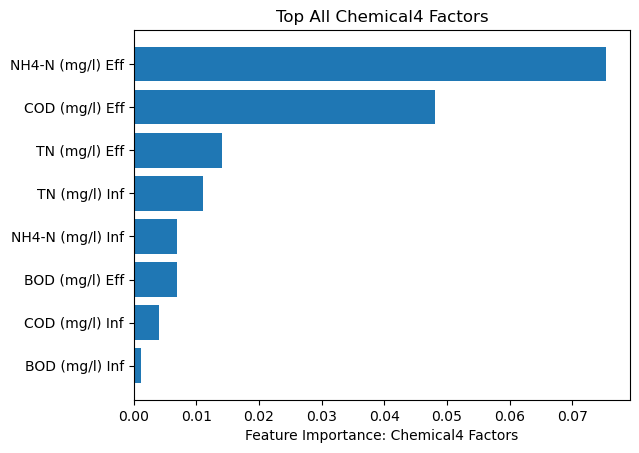

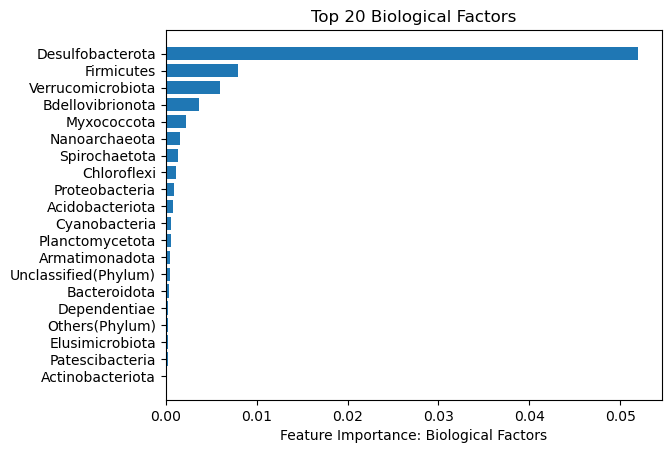

In [84]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_4,biological_keywords]

perm_importance_mean, sorted_idx = regressor10.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical4', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_4, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_tpp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_tpp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()

In [ ]:
regressor6.regressor = regressor6.best_regressor.model
regressor6.original_predictor = 'rfr'

regressor7.regressor = regressor7.best_regressor.model
regressor7.original_predictor = 'rfr'

regressor8.regressor = regressor8.best_regressor.model
regressor8.original_predictor = 'rfr'

regressor9.regressor = regressor9.best_regressor.model
regressor9.original_predictor = 'rfr'

regressor10.regressor = regressor10.best_regressor.model
regressor10.original_predictor = 'rfr'

In [ ]:
regressor6.imp_features(extensive = True)
regressor7.imp_features(extensive = True)
regressor8.imp_features(extensive = True)
regressor9.imp_features(extensive = True)
regressor10.imp_features(extensive = True)